In [1]:
# -*- coding: utf-8 -*-
"""
Created on Sun Aug 25 10:29:53 2019

@author: mor
"""

import matplotlib.pyplot as plt
import pandas as pd
import geopandas
from shapely.geometry import Point,Polygon
import contextily



In [2]:

import matplotlib
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)


   visit_date                                name  n_workers mineral  \
0  2013-03-27                           Mayi-Tatu      150.0    Gold   
1  2013-03-27                             Mabanga      115.0    Gold   
2  2013-03-27                             Molende      130.0    Gold   
3  2013-03-27                          Embouchure      135.0    Gold   
4  2013-03-27  Apumu-Atandele-Jerusalem-Luka Yayo      270.0    Gold   

                   geometry  
0  POINT (29.66033 1.01089)  
1  POINT (29.65862 1.00308)  
2  POINT (29.65629 0.98563)  
3  POINT (29.64494 0.99976)  
4       POINT (29.66 0.956)  
{'init': 'epsg:4326'}


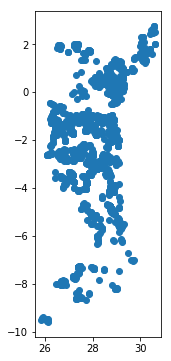

In [3]:


# Import GeoPandas and Matplotlib
import geopandas
import matplotlib.pyplot as plt

# Read the mining site data
mining_sites = geopandas.read_file("data/ipis_cod_mines.geojson")

# Print the first rows and the CRS information
print(mining_sites.head())
print(mining_sites.crs)

# Make a quick visualisation
mining_sites.plot()
plt.show()



In [4]:

#national_parks = geopandas.read_file("data/congo_shapefile")
#national_parks=national_parks.to_crs({'datum': 'WGS84', 'lat_ts': 5, 'lon_0': 0, 'no_defs': True, 'proj': 'merc',
# 'units': 'm', 'x_0': 0, 'y_0': 0})
#
#national_parks.to_file('data/congo_shapefile')



        WDPAID   WDPA_PID PA_DEF                              NAME  \
0  555555524.0  555555524      1  Lyondji Bonobo Community Reserve   
1     478291.0     478291      1         Parc national des Virunga   
2      72340.0      72340      1            Luo Scientific Reserve   
3     478292.0     478292      1                           Salonga   
4       9143.0       9143      1      RÃ©serve forestiÃ¨re de Luki   

                                        ORIG_NAME  \
0  RÃ©serve Communautaires des Bonobos d' Iyondji   
1                       Parc national des Virunga   
2                 RÃ©serve Scientifique de la Luo   
3                     Parc National de la Salonga   
4                    RÃ©serve forestiÃ¨re de Luki   

                                              DESIG  \
0         ForÃªt ClassÃ©e et RÃ©serve Communautaire   
1  Ramsar Site, Wetland of International Importance   
2                                          RÃ©serve   
3                      RÃ©serve Naturell

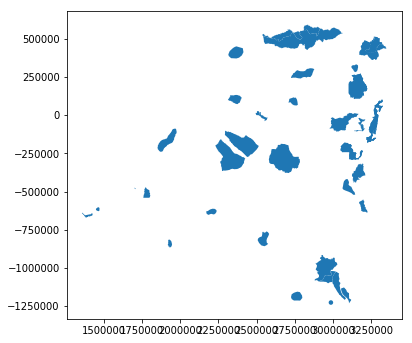

In [5]:

# Import GeoPandas and Matplotlib
import geopandas
import matplotlib.pyplot as plt

# Read the mining site data
national_parks = geopandas.read_file("data/congo_shapefile")

# Print the first rows and the CRS information
print(national_parks.head())
print(national_parks.crs)

# Make a quick visualisation
national_parks.plot()
plt.show()



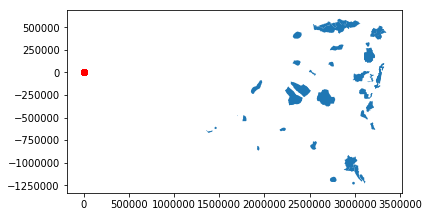

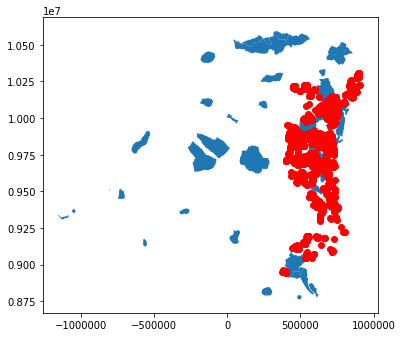

In [6]:


# Plot the natural parks and mining site data
ax = national_parks.plot()
mining_sites.plot(ax=ax, color='red')
plt.show()

# Convert both datasets to UTM projection
mining_sites_utm = mining_sites.to_crs(epsg=32735)
national_parks_utm = national_parks.to_crs(epsg=32735)

# Plot the converted data again
ax = national_parks_utm.plot()
mining_sites_utm.plot(ax=ax, color='red')
plt.show()



In [7]:


# Read the mining site data
mining_sites = geopandas.read_file("data/ipis_cod_mines.geojson")
national_parks = geopandas.read_file("data/congo_shapefile")

# Convert both datasets to UTM projection
mining_sites_utm = mining_sites.to_crs(epsg=32735)
national_parks_utm = national_parks.to_crs(epsg=32735)

# Write converted data to a file
#mining_sites_utm.to_file('data/ipis_cod_mines_utm.gpkg',driver='GPKG')
#national_parks_utm.to_file("data/cod_conservation_utm.shp",driver='ESRI Shapefile')



In [8]:

national_parks=national_parks_utm
mining_sites=mining_sites_utm



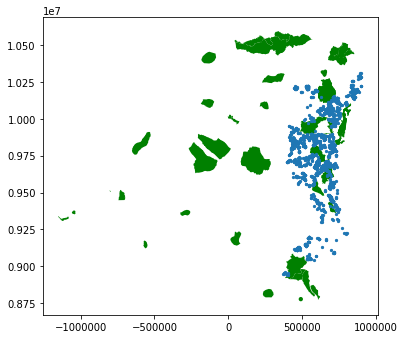

In [9]:


# Plot of the parks and mining sites
ax = national_parks.plot(color='green')
mining_sites.plot(ax=ax, markersize=5)
plt.show()



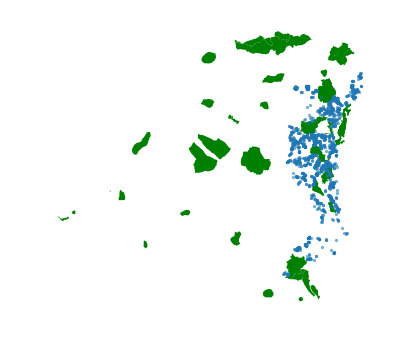

In [10]:


# Plot of the parks and mining sites
ax = national_parks.plot(color='green')
mining_sites.plot(ax=ax, markersize=5, alpha=0.5)
ax.set_axis_off()
plt.show()



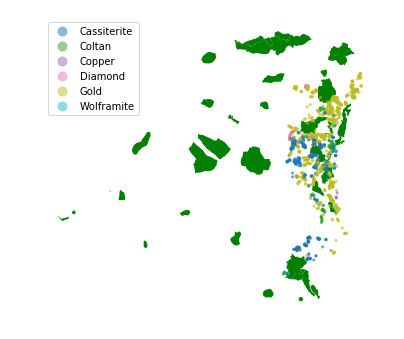

In [11]:


# Plot of the parks and mining sites
ax = national_parks.plot(color='green')
mining_sites.plot(column='mineral',ax=ax, markersize=5, alpha=0.5,legend=True)
ax.set_axis_off()
plt.show()



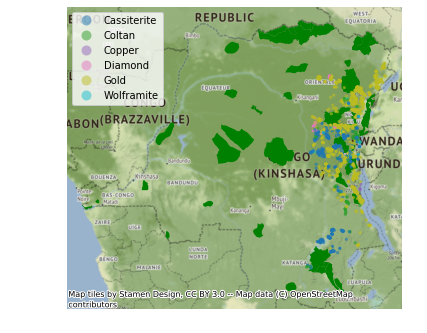

In [12]:

national_parks_3857=national_parks.to_crs(epsg=3857)
mining_sites_3857=mining_sites.to_crs(epsg=3857)

# Plot of the parks and mining sites
ax = national_parks_3857.plot(color='green')
mining_sites_3857.plot(column='mineral',ax=ax, markersize=5, alpha=0.5,legend=True)
ax.set_axis_off()
contextily.add_basemap(ax)
plt.show()



In [13]:


goma=Point(746989.5594829298,9816380.942287602)



In [14]:


# goma is a Point
print(type(goma))

# Create a buffer of 50km around Goma
goma_buffer = goma.buffer(50000)

# The buffer is a polygon
print(type(goma_buffer))

# Check how many sites are located within the buffer
mask = mining_sites.within(goma_buffer)
print(mask.sum())

# Calculate the area of national park within the buffer
print(national_parks.intersection(goma_buffer).area.sum() / (1000**2))



<class 'shapely.geometry.point.Point'>
<class 'shapely.geometry.polygon.Polygon'>
87
3894.8385677441656


In [15]:


national_parks=national_parks.rename(columns={'NAME':'Name'})


In [16]:

# Extract the single polygon for the Kahuzi-Biega National park
kahuzi = national_parks[national_parks['Name'] == "Kahuzi-Biega National Park"].geometry.squeeze()

# Take a subset of the mining sites located within Kahuzi
sites_kahuzi = mining_sites[mining_sites.within(kahuzi)]
print(sites_kahuzi)

# Determine in which national park a mining site is located
sites_within_park = geopandas.sjoin(mining_sites, national_parks, op='within', how='inner')
print(sites_within_park.head())

# The number of mining sites in each national park
print(sites_within_park['Name'].value_counts())



      visit_date                   name  n_workers      mineral  \
663   2013-08-27          Mutete/Mukina      170.0  Cassiterite   
664   2013-08-28                 Mutete      100.0  Cassiterite   
760   2014-02-25              Mazankala      120.0  Cassiterite   
813   2015-07-28             Kitendebwa       50.0         Gold   
869   2013-09-28           Sebwa-Lukoma      130.0  Cassiterite   
870   2013-10-30              Rwamakaza      160.0  Cassiterite   
1481  2009-01-01               Mugaba I       50.0         Gold   
1482  2009-01-01           Mugaba Ouest       46.0         Gold   
1607  2015-08-01                Kananga       36.0       Coltan   
1676  2015-08-02  Nguba(Nkuba) kamisoke      122.0  Cassiterite   

                                         geometry  
663   POINT (570733.4369126211 9761871.114227083)  
664   POINT (569881.0930415759 9762219.110778008)  
760   POINT (613075.5326777868 9722956.979837928)  
813   POINT (693078.9282059025 9770107.517721133)  
86

In [17]:


# Get the geometry of the first row
single_mine = mining_sites.geometry[0]

# Calculate the distance from each national park to this mine
dist = national_parks.distance(single_mine)

# The index of the minimal distance
idx = dist.idxmin()

# Access the name of the corresponding national park
closest_park = national_parks.loc[idx, 'Name']
print(closest_park)



Virunga


In [18]:


# Define a function that returns the closest national park
def closest_national_park(geom, national_parks):
    dist = national_parks.distance(geom)
    idx = dist.idxmin()
    closest_park = national_parks.loc[idx,'Name']
    return closest_park

# Call the function on single_mine
print(closest_national_park(single_mine, national_parks))

# Apply the function to all mining sites
mining_sites['closest_park'] = mining_sites.geometry.apply(closest_national_park, national_parks=national_parks)
print(mining_sites.head())



Virunga
   visit_date                                name  n_workers mineral  \
0  2013-03-27                           Mayi-Tatu      150.0    Gold   
1  2013-03-27                             Mabanga      115.0    Gold   
2  2013-03-27                             Molende      130.0    Gold   
3  2013-03-27                          Embouchure      135.0    Gold   
4  2013-03-27  Apumu-Atandele-Jerusalem-Luka Yayo      270.0    Gold   

                                      geometry closest_park  
0  POINT (796089.4159891906 10111855.17426374)      Virunga  
1  POINT (795899.6640655082 10110990.83998195)      Virunga  
2  POINT (795641.7066578076 10109059.78659637)      Virunga  
3  POINT (794376.3093052682 10110622.24995522)      Virunga  
4  POINT (796057.5042468573 10105781.54751797)      Virunga  


In [19]:
#mining_sites=mining_sites.to_crs(epsg=4326)
#
## Import the rasterio package
#import rasterio
#
## Open the raster dataset
#src = rasterio.open("central_africa_vegetation_map_foraf.tif")
#
## Import the plotting functionality of rasterio
#import rasterio.plot
#
## Plot the raster layer with the mining sites
#ax = rasterio.plot.show(src)
#mining_sites.plot(ax=ax,markersize=1,color='red')
#plt.show()


In [20]:

#vegetation_types={0: 'TODO', 1: 'Dense moist forest',2: 'Submontane forest',3: 'Mountain forest',4: 'Edaphic forest',
#                 5: 'Mangrove',6: 'Forest-savanna mosaic',7: 'Rural complex and Young secondary forest ',8: 'Closed to open deciduous woodland',
#                 9: 'Savanna woodland - Tree savanna',10: 'Shrubland ',11: 'Grassland',12: 'Aquatic grassland',13: 'Swamp grassland',
#                 14: 'Sparse vegetation',15: 'Mosaic cultivated areas / vegetation (herbaceous or shrubs)',16: 'Agriculture',
#                 17: 'Irrigated agriculture',18: 'Bare areas ',19: 'Artificial Surfaces and Associated Areas ',20: 'Water Bodies '}
#


In [21]:


## Import the rasterstats package
#import rasterstats
#
## Extract the nearest value in the raster for all mining sites
#vegetation_raster = "central_africa_vegetation_map_foraf.tif"
#mining_sites['vegetation'] = rasterstats.point_query(mining_sites.geometry, vegetation_raster, interpolate='nearest')
#print(mining_sites.head())
#
## Replace numeric vegation types codes with description
#mining_sites['vegetation'] = mining_sites['vegetation'].replace(vegetation_types)
#
## Make a plot indicating the vegetation type
#mining_sites.plot(column='vegetation',legend=True)
#plt.show()

